# COUNTOUR FEATURES

https://docs.opencv.org/4.5.3/d3/d05/tutorial_py_table_of_contents_contours.html  
https://docs.opencv.org/4.5.3/dd/d49/tutorial_py_contour_features.html

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv.imread("img/logo.png", cv.IMREAD_GRAYSCALE)
# ret, threshold = cv.threshold(img, 127, 255, 0)
img = cv.medianBlur(img, 33)
threshold = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
contours, hiearchy = cv.findContours(threshold, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = contours[1]

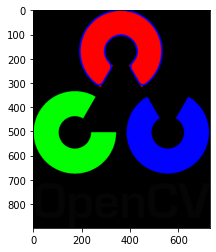

In [3]:
img_c = cv.imread("img/logo.png")
cv.drawContours(img_c, contours, 1, (255, 0, 0), 5)
plt.imshow(cv.cvtColor(img_c, cv.COLOR_BGR2RGB))

# 1. Moments

In [4]:
M = cv.moments(cnt)
M

{'m00': 63193.5,
 'm10': 22880649.833333332,
 'm01': 9170665.166666666,
 'm20': 8893980919.583332,
 'm11': 3320369131.125,
 'm02': 1727509762.9166665,
 'm30': 3661637692988.95,
 'm21': 1303181955484.5833,
 'm12': 625465353799.15,
 'm03': 370176944618.75,
 'mu20': 609519118.9928179,
 'mu11': -79624.16229200363,
 'mu02': 396659286.2202759,
 'mu30': -11845367.481933594,
 'mu21': 12541663254.06137,
 'mu12': 4102944.270629883,
 'mu03': 4353361398.8498535,
 'nu20': 0.15263091704694948,
 'nu11': -1.9938847742472295e-05,
 'nu02': 0.09932825521704841,
 'nu30': -1.1799606228172391e-05,
 'nu21': 0.012493212056947225,
 'nu12': 4.087093696620868e-06,
 'nu03': 0.0043365434085265615}

## 2. Countour Area

In [5]:
area = cv.contourArea(cnt)
area

63193.5

## 3. Countour Perimeter

In [6]:
perimeter = cv.arcLength(cnt, True)
perimeter

1485.373795747757

## 4. Countour Approximation

TODO: dig in later

[[[263  32]]

 [[195 140]]

 [[226 271]]

 [[288 299]]

 [[300 145]]

 [[369 103]]

 [[463 306]]

 [[530 194]]

 [[500  71]]

 [[383   0]]]


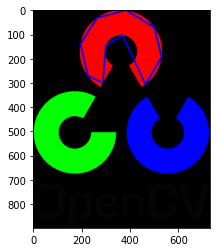

In [7]:
epsilon = 0.03 * cv.arcLength(cnt, True)
approx = cv.approxPolyDP(cnt, epsilon, True)
print(approx)
img_c = cv.imread("img/logo.png")
cv.drawContours(img_c, [approx], -1, (255, 0, 0), 5)
plt.imshow(cv.cvtColor(img_c, cv.COLOR_BGR2RGB))

## 5. Convex Hull

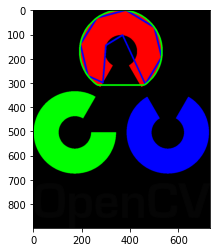

In [8]:
hull = cv.convexHull(cnt)
cv.drawContours(img_c, [hull], -1, (0, 255, 0), 5)
plt.imshow(cv.cvtColor(img_c, cv.COLOR_BGR2RGB))

## 6. Checking Convexity

In [9]:
cv.isContourConvex(cnt)

False

## 7. Bounding Rectangle

### 7.1. Straight Bounding Rectangle

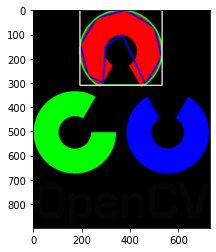

In [10]:
x, y, width, height = cv.boundingRect(cnt)
cv.rectangle(img_c, (x, y), (x + width, y + height), (255, 255, 255), 3)
plt.imshow(cv.cvtColor(img_c, cv.COLOR_BGR2RGB))

### 7.2. Rotated Rectangle

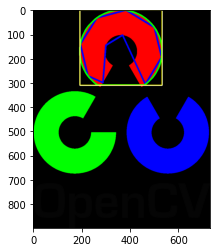

In [11]:
rect = cv.minAreaRect(cnt) # get rect (center (x,y), (width, height), angle of rotation)
box = cv.boxPoints(rect) # find corner points
box = np.int0(box) # convert to int
cv.drawContours(img_c, [box], 0, (0, 255, 255), 2)
plt.imshow(cv.cvtColor(img_c, cv.COLOR_BGR2RGB))

## 8. Minimum Enclosing Circle

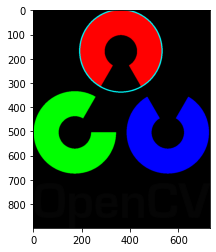

In [12]:
img_c = cv.imread("img/logo.png")
(x, y), radius = cv.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
cv.circle(img_c, center, radius, (255, 255, 0), 3)
plt.imshow(cv.cvtColor(img_c, cv.COLOR_BGR2RGB))

## 9. Fitting an Ellipse

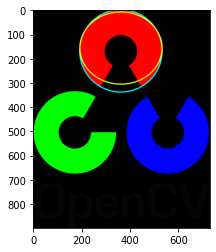

In [13]:
ellipse = cv.fitEllipse(cnt)
cv.ellipse(img_c, ellipse, (0, 255, 255), 3)
plt.imshow(cv.cvtColor(img_c, cv.COLOR_BGR2RGB))

## 10. Fitting a Line

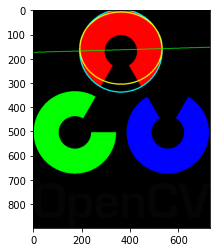

In [14]:
rows, cols = img_c.shape[:2]
[vx, vy, x, y] = cv.fitLine(cnt, cv.DIST_L2, 0, 0.01, 0.01)
lefty = int((-x * vy / vx) + y)
righty = int(((cols - x) * vy / vx) + y)
cv.line(img_c, (cols - 1, righty), (0, lefty),(0, 255, 0), 2)
plt.imshow(cv.cvtColor(img_c, cv.COLOR_BGR2RGB))